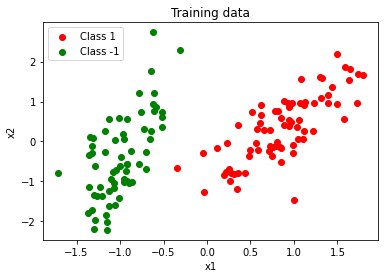

In [1]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

plt.title('Training data')
plt.scatter(xtrain[ytrain==1,0], xtrain[ytrain==1,1], c='r', label='Class 1')
plt.scatter(xtrain[ytrain==-1,0], xtrain[ytrain==-1,1], c='g', label='Class -1')
plt.xlabel("x1"); plt.ylabel("x2");
plt.legend()
plt.show()